ww

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank-full.csv"

df = pd.read_csv(file_path)

In [9]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [36]:
import pandas as pd

file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank-full.csv"

columns = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "balance",
    "housing",
    "loan", 
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous", 
    "poutcome",
    "y"
]

df = pd.read_csv(file_path, sep=';', header=None, names=columns)

df = df.replace('"', '', regex=True)

df = df[df.columns].loc[~(df == df.columns).all(axis=1)]

output_file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank structured2.csv"
df.to_csv(output_file_path, index=False)

print(f"Structured dataset saved.")


C:\Users\Deshan\AppData\Local\Temp\ipykernel_19448\3804074540.py:25: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', header=None, names=columns)


Structured dataset saved.


In [11]:
df = pd.read_csv(output_file_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


For categorical features

In [13]:
for col in df.select_dtypes(include='object').columns: # to understand categorical features
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [14]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

for feature in categorical_features:
    print('For feature, {} , it has {} categories'.format(feature,len(df[feature].unique())))

For feature, job , it has 12 categories
For feature, marital , it has 3 categories
For feature, education , it has 4 categories
For feature, default , it has 2 categories
For feature, housing , it has 2 categories
For feature, loan , it has 2 categories
For feature, contact , it has 3 categories
For feature, month , it has 12 categories
For feature, poutcome , it has 4 categories


relationship between categorical features and target value...

In [15]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

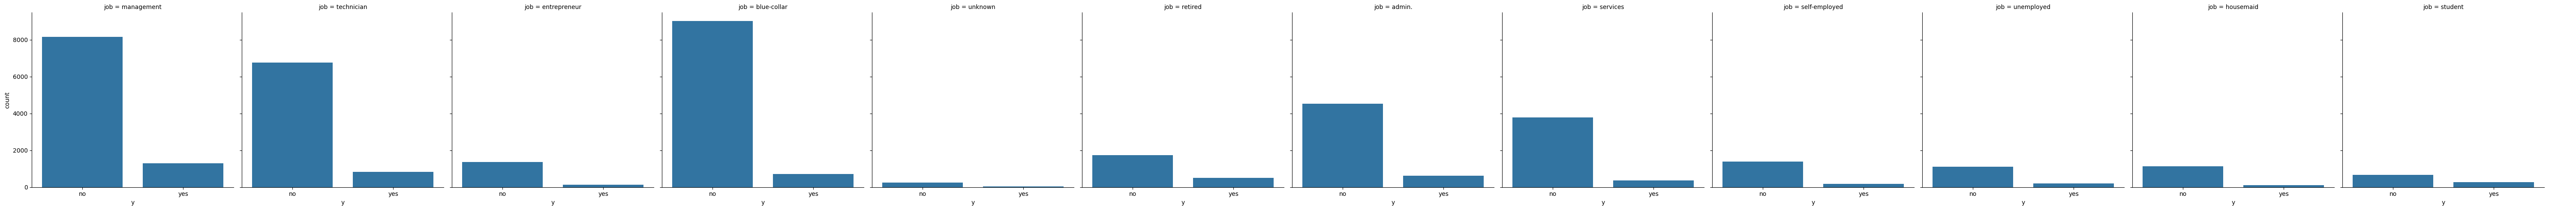

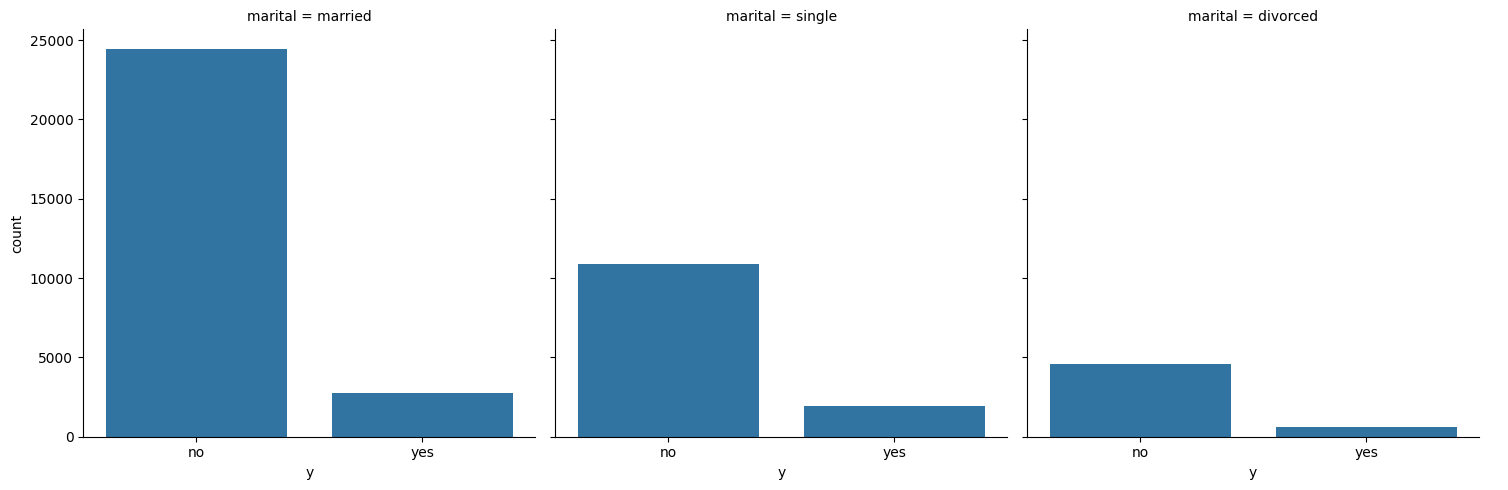

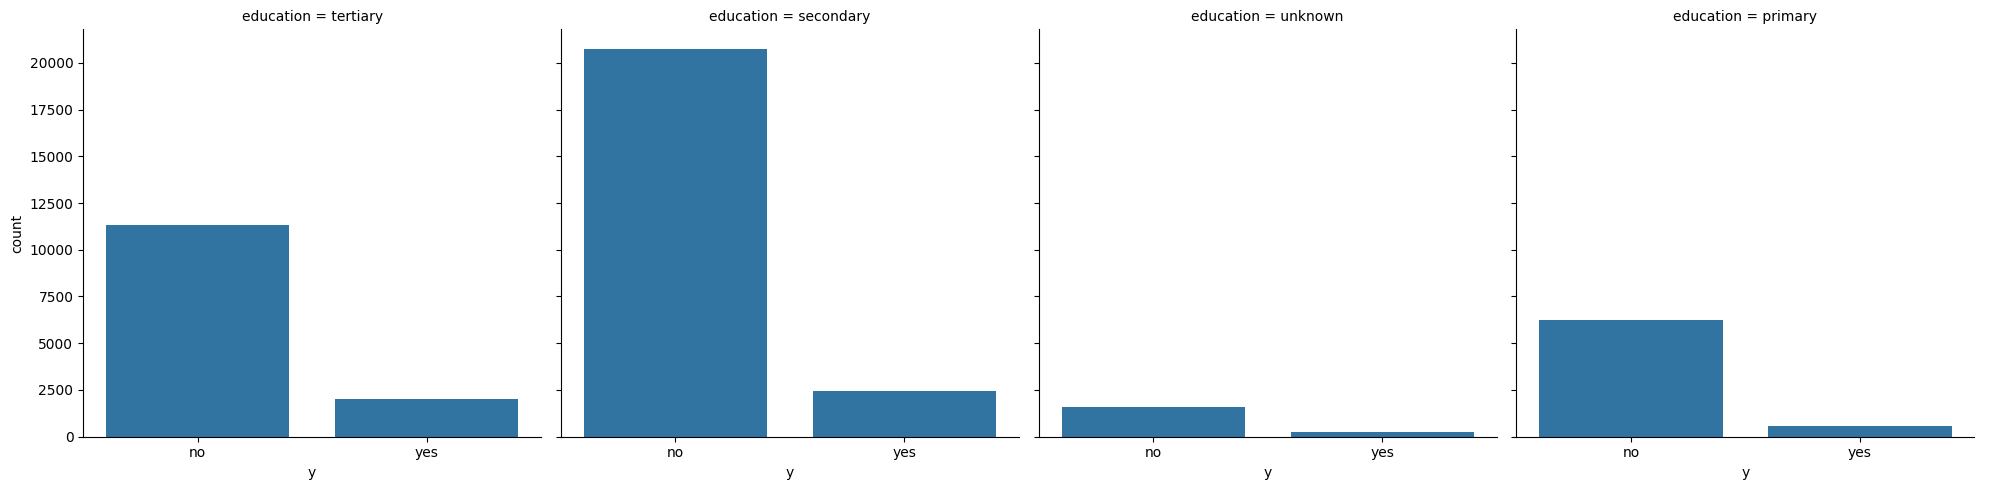

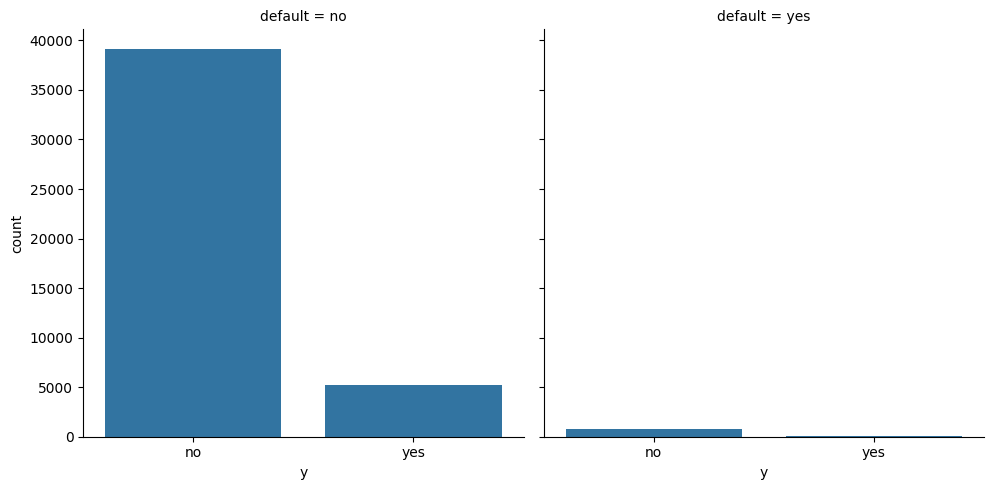

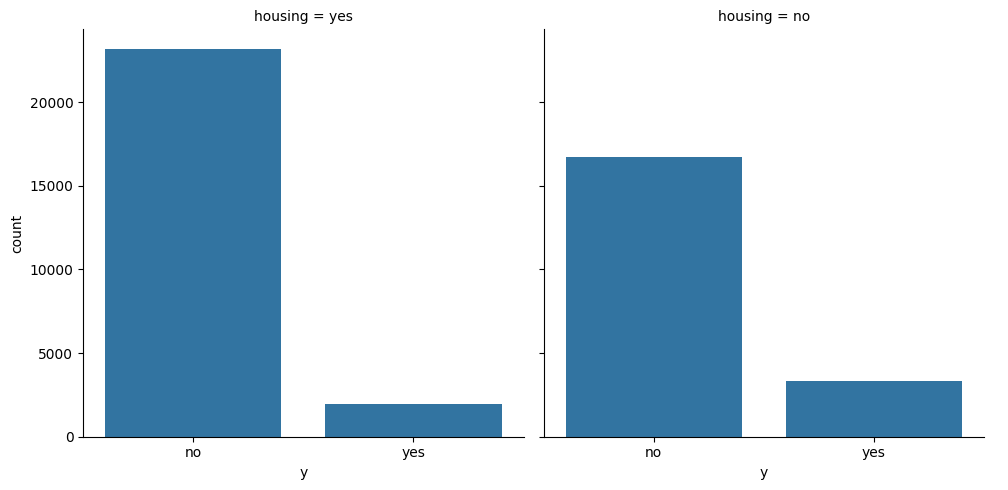

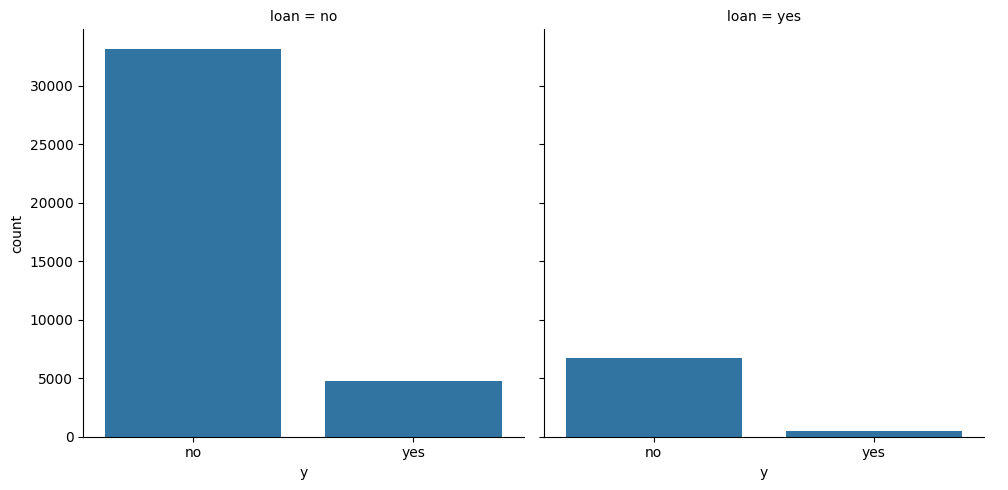

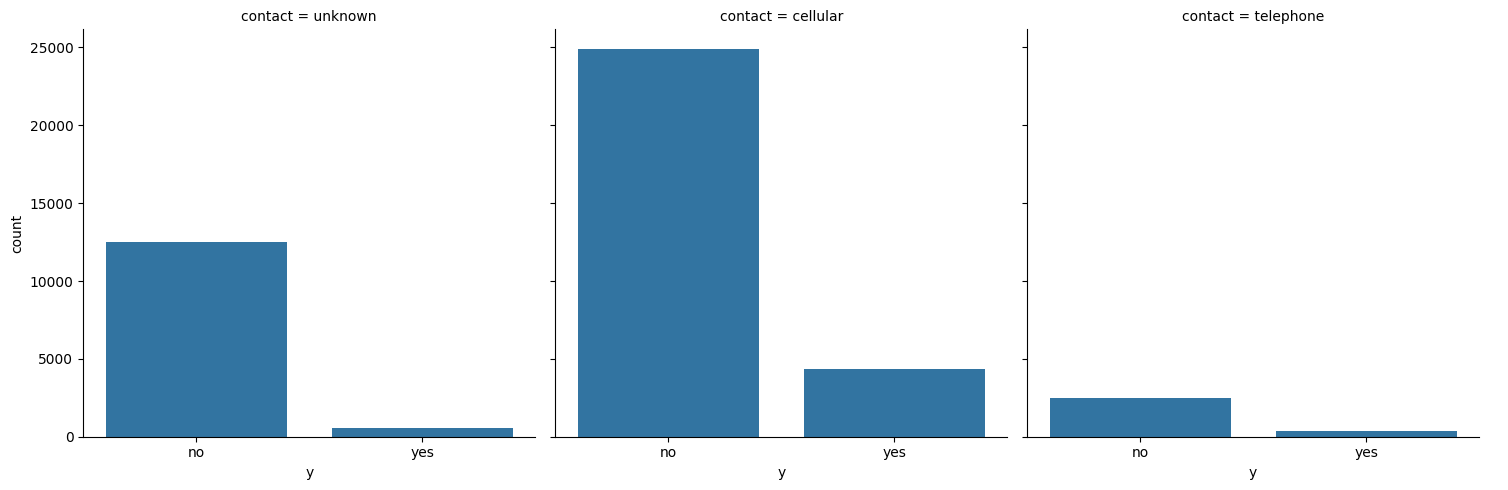

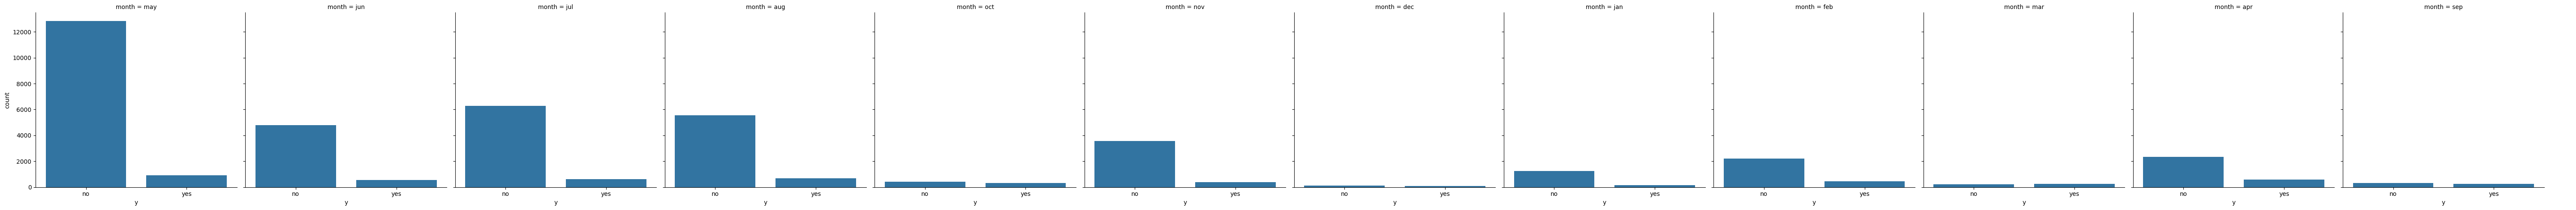

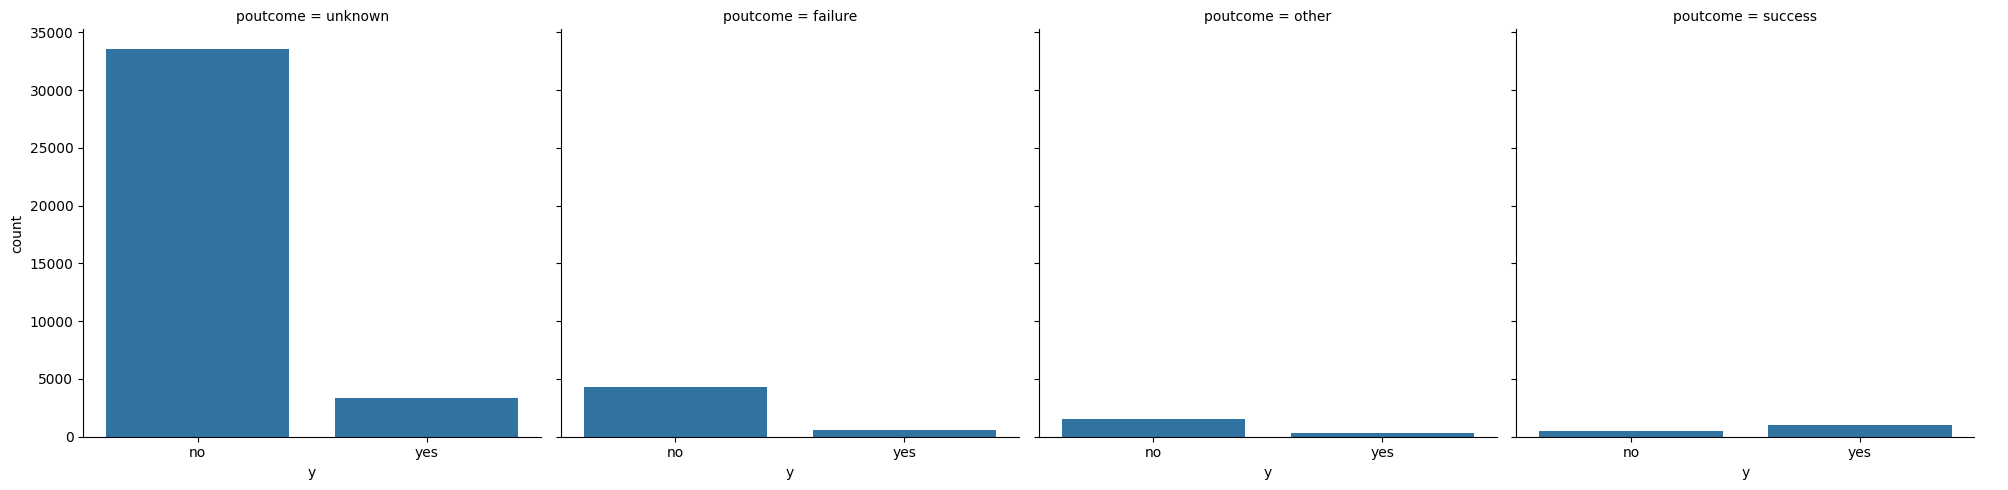

In [16]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

Describing numerical features

In [17]:
df.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  7 numerical variables


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


to find discrete numerical features...

In [19]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]

print("Discrete Variables count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables count: 0
[]


to find continuos numerical features...

In [20]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))
print(continuous_features)

Continuous feature count 7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In target variable....

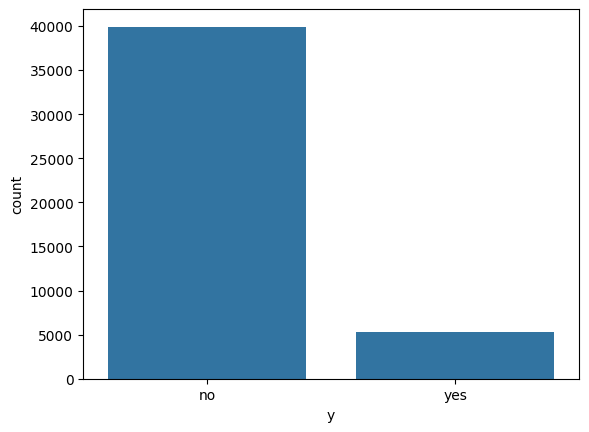

In [21]:
sns.countplot(x='y',data=df)
plt.show()

In [22]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

relationship between continus features and the target variable

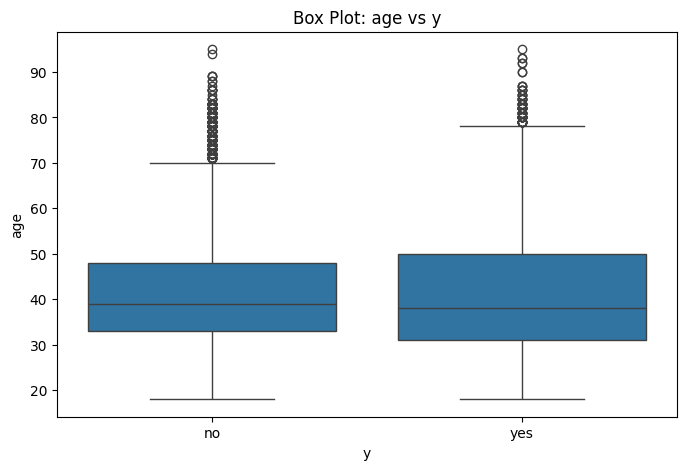

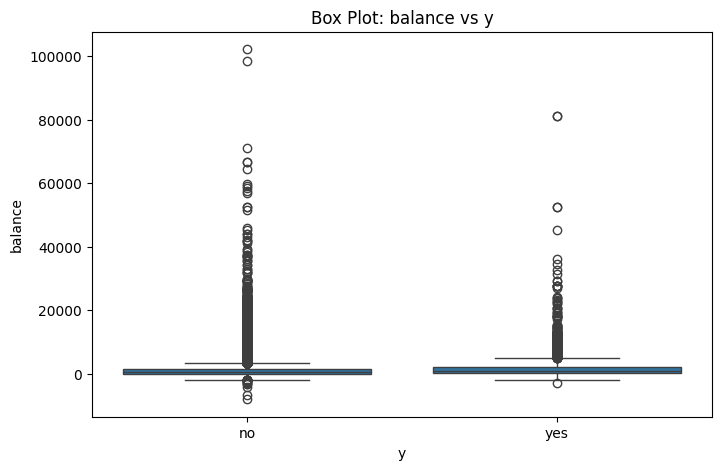

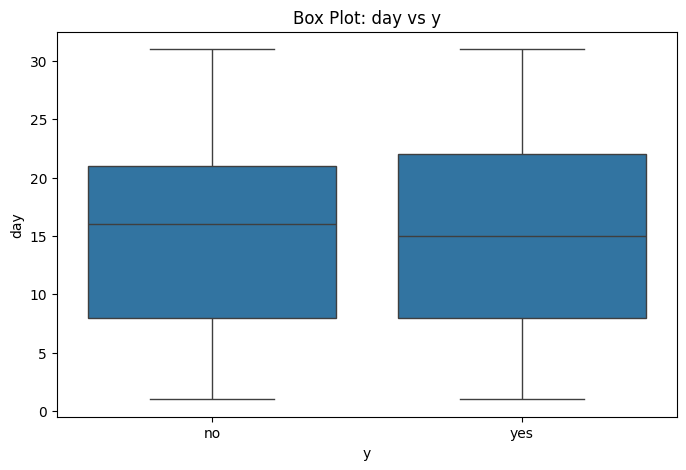

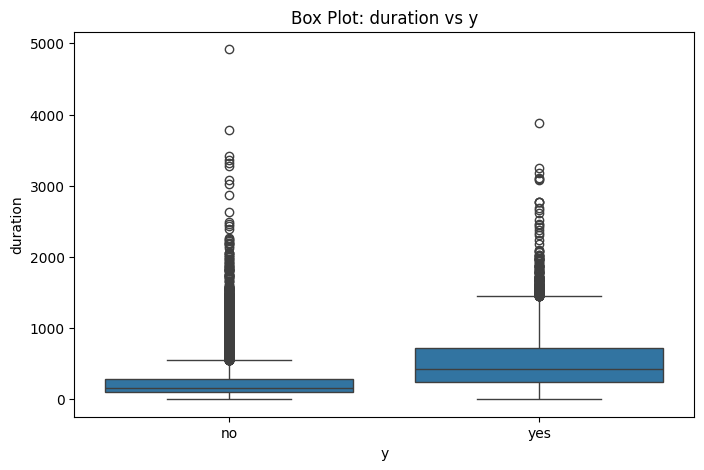

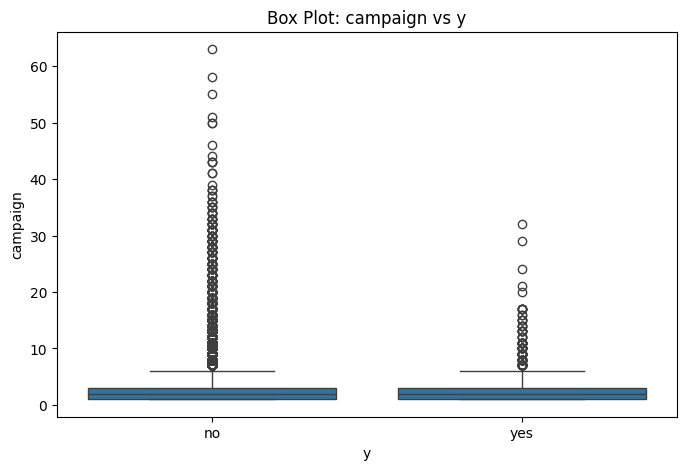

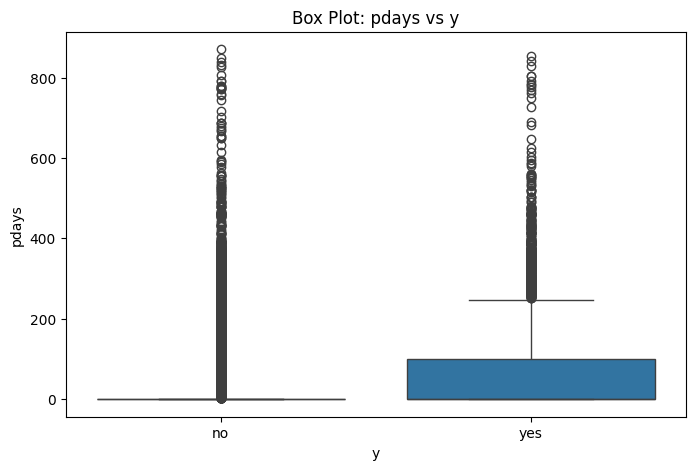

In [23]:
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

#target variable
label = "y"

for feature in continuous_features:
    # box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=label, y=feature)
    plt.title(f"Box Plot: {feature} vs {label}")
    plt.xlabel(label)
    plt.ylabel(feature)
    plt.show()


correlation between neumerical features

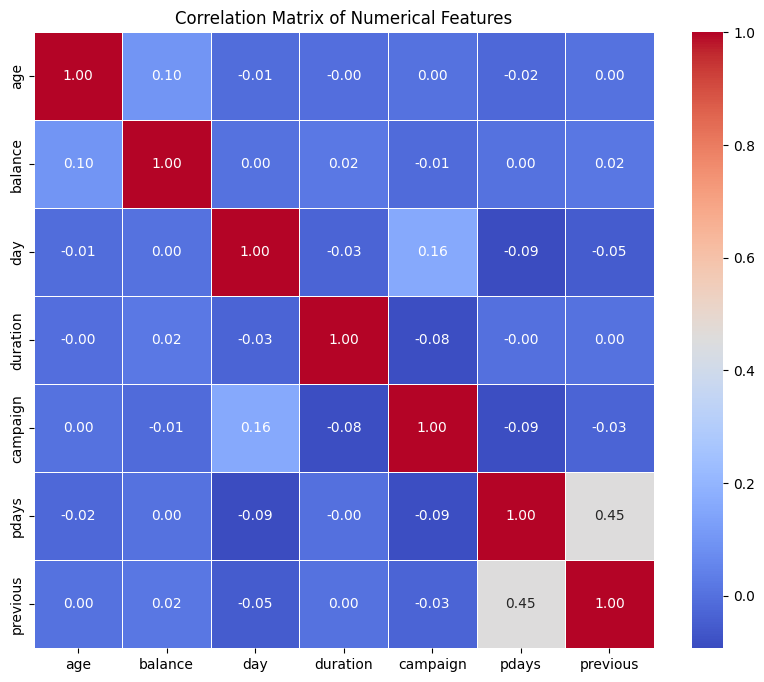

In [24]:
numerical_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

#correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Feature Engineering

Missing values...

In [25]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


Features with one values

In [26]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


To find outliers...

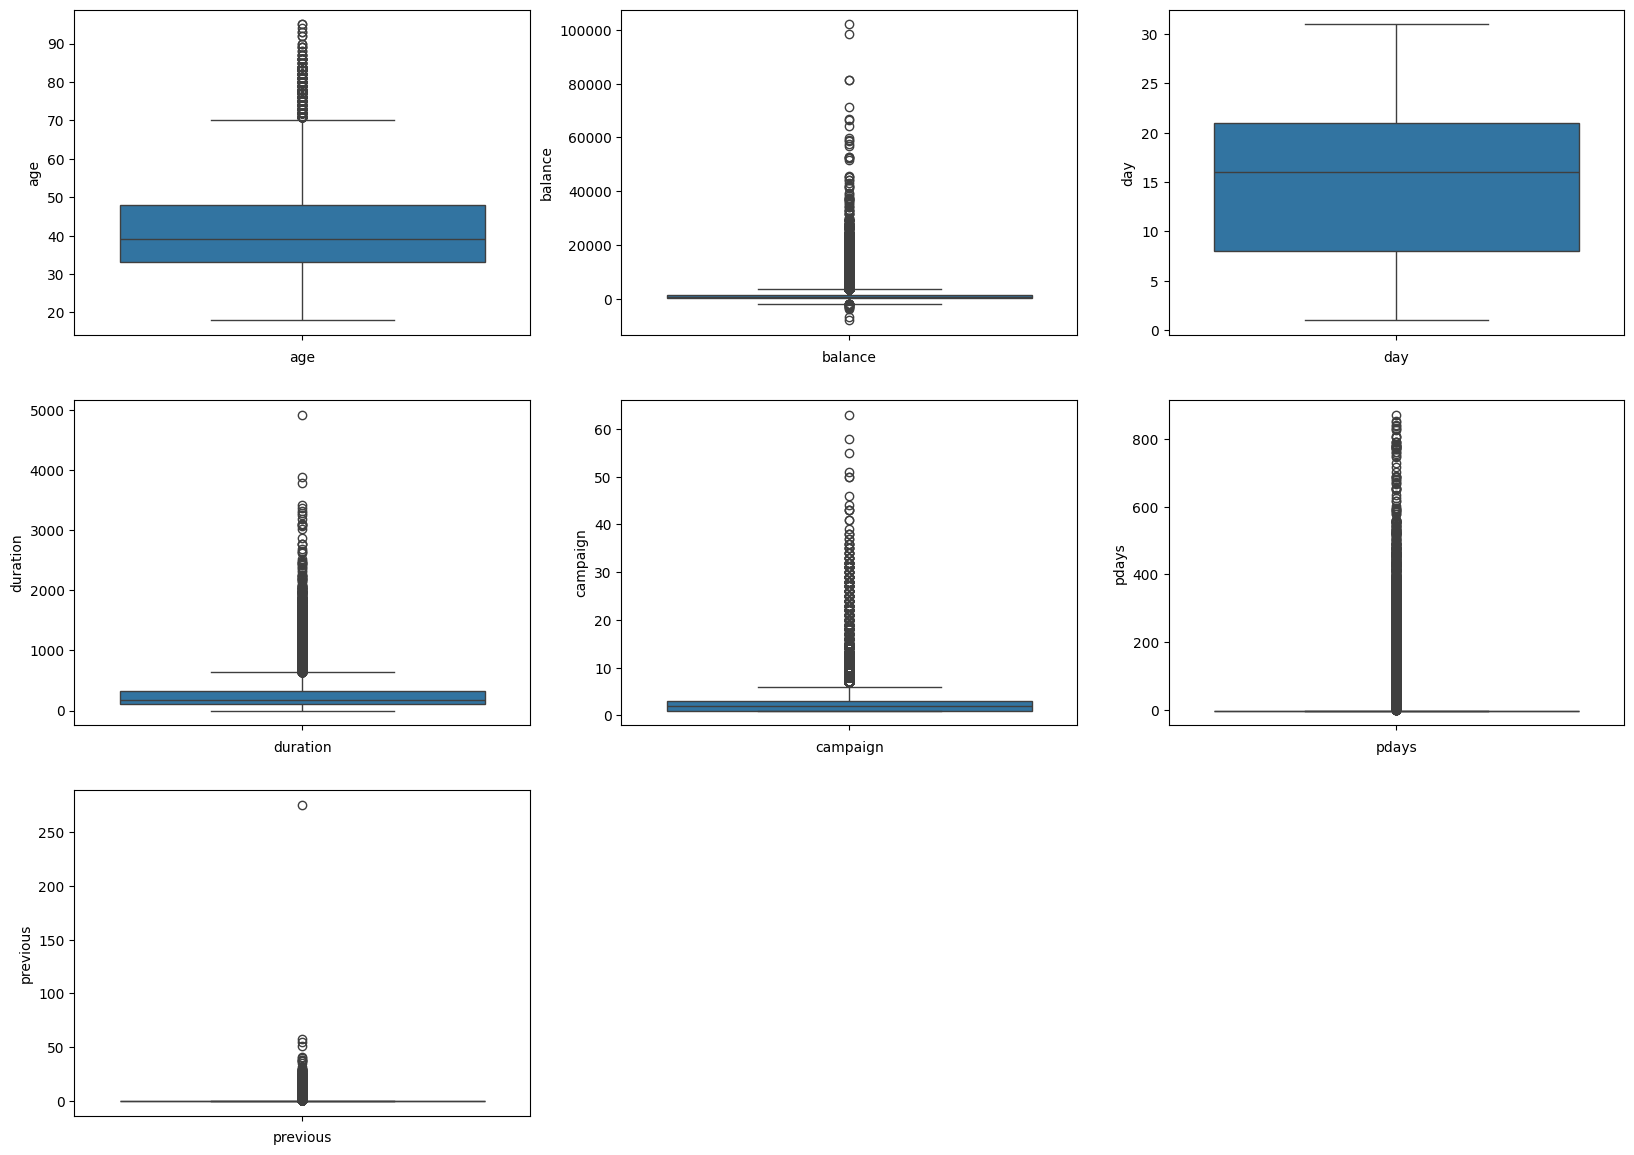

In [27]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

New data frame..

In [28]:
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df2.shape

(45211, 17)

Target variable with other features....

Default

In [30]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [31]:
df2.drop(['default'],axis=1, inplace=True)

pdays

In [32]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [33]:
df2.drop(['pdays'],axis=1, inplace=True)

age

In [34]:
df2.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Name: age, Length: 148, dtype: int64

balance

In [35]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

duration

In [ ]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

campaign

In [ ]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

previous

In [ ]:
df2.groupby(['y','previous'],sort=True)['previous'].count()

In [ ]:
df2.drop(['previous'],axis=1, inplace=True)

poutcome

In [ ]:
df2.groupby(['y','poutcome'],sort=True)['poutcome'].count() 


day

In [ ]:
df2.groupby(['y','day'],sort=True)['day'].count() 

month

In [ ]:
df2.groupby(['y','month'],sort=True)['month'].count() 

capping outliers...

In [ ]:
numerical_features = ['age', 'balance', 'duration', 'campaign']

# Capping outliers
for feature in numerical_features:
    lower_percentile = df2[feature].quantile(0.05)  # 5th percentile
    upper_percentile = df2[feature].quantile(0.95)  # 95th percentile
    
    df2[feature] = df2[feature].clip(lower=lower_percentile, upper=upper_percentile)
    print(f"{feature}: Capped between {lower_percentile} and {upper_percentile}")

print(df2[numerical_features].describe())


In [ ]:
# boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1
for feature in numerical_features :
    plt.subplot(3, 2, plotnumber)
    sns.boxplot(df2[feature])
    plt.title(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()


new dataframe

In [ ]:
df3 = df2.copy()

print(df3.columns)

one hot encoding categorical features and converting boolean columns into numerical format...

In [ ]:
# one-hot encoding for categorical columns
cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
dummies_df = pd.get_dummies(df3[cat_columns], prefix=cat_columns, drop_first=True)

df3 = pd.concat([df3.drop(cat_columns, axis=1), dummies_df], axis=1)

# boolean columns into numerical format
bool_columns = ['housing', 'loan', 'y']
for col in bool_columns:
    df3[col + '_new'] = df3[col].apply(lambda x: 1 if x == 'yes' else 0)

df3 = df3.drop(bool_columns, axis=1)

# updated dataframe
print(df3.info())


feature scaling for standarizalation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'day']
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])


correlation analysis between features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


spliting dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df3.drop('y_new', axis=1)  # features

y = df3['y_new']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
len(X_train)

In [ ]:
len(X_test)

model selection and set up

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import pandas as pd

rf_model = RandomForestClassifier(random_state=42)

# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# gridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fitting
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

rf_model = grid_search.best_estimator_

# feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance")
plt.show()


model training

In [ ]:
# training
rf_model.fit(X_train, y_train)
print("Random Forest Classifier trained successfully.")

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# predicting
y_pred = rf_model.predict(X_test)

import pandas as pd
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})



results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1-Score: {f1:.2f}")

print(f"AUC-ROC: {auc_roc:.2f}")

# classification report
print(classification_report(y_test, y_pred))

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
